# Logistic Regression on HR Analytics Dataset
This project is one of my Machine Learning mini projects. For this project, we have a [HR analytics](https://github.com/richardcsuwandi/datasets/blob/master/HR_comma_sep.csv) dataset that contains  14,999 samples and 10 categories. The dataset is retrieved from Kaggle: https://www.kaggle.com/giripujar/hr-analytics

The goal of this project is to create a Logistic Regression model to predict whether the employees will leave the firm based on the given features. 

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Data

In [169]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Here, the target variable is the 'left' column, where 1 indicates that the employee left the firm and 0 otherwise. The other columns are the features of this dataset.

## Preprocessing the Data

In [170]:
# Checking for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

As shown above, there are no missing values in this dataset.

## Exploratory Data Analysis (EDA)
Before we begin fitting a Logistic Regression model on the data, let's try and eyeball it first. Here, we will make some explorations and visualizations to understand the relationship of the target variable with other features.

### For the numerical variables

First, let's create a table that contains the average values of all numerical categories based on the target variable.

In [171]:
# Create the tabel
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the table above, we can observe that:
- The satisfication level seems to be relatively low in employees that left the firm (0.440098) as opposed to the ones who stayed (0.666810)
- The average monthly hours are higher in employees leaving the firm (199 vs. 207).
- Based on the promotion in the last 5 years, employees who are given promotion are more likely to stay at firm.

Additionally, we can create a correlation matrix to measure the linear relationships between the variables.

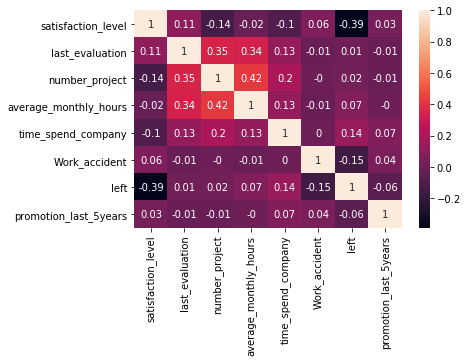

In [172]:
# Create a correlation matrix
corr_matrix = df.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

A quick look at the correlation matrix, we can observe that the satisfaction level has the strongest negative correlation with the target variable whereas the time spend in the company has the strongest positive correlation with the target variable.

### For the categorical features

Let's create a crosstab to show the relationships between two categorical variables.

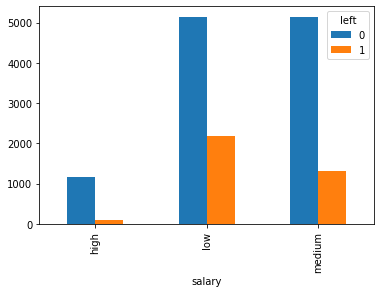

In [173]:
# Create a crosstab chart between the salary and target variable
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

The above chart shows that employees with high salaries are more likely to stay at the company.

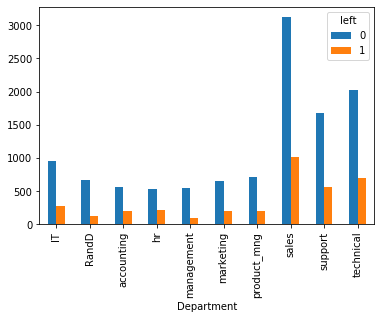

In [174]:
# Create a crosstab plot between the department and target variable
pd.crosstab(df['Department'], df['left']).plot(kind='bar')

The above chart suggests that there might be some impact of department on whether the employee will leave the firm or not. However, the impact is not major so we will ignore department in our analysis.

From the data exploration and analysis so far, we are only going to use the following variables to train our model:
- satisfaction_level
- average_monthly_hours
- promotion_last_5years
- time_spend_company
- salary

In [175]:
# Create a sub-dataframe
sub_df = df[['satisfaction_level', 'average_monthly_hours', 'promotion_last_5years', 'time_spend_company', 'salary']]
sub_df.head()

,satisfaction_level,average_monthly_hours,promotion_last_5years,time_spend_company,salary
0,0.38,157,0,3,low
1,0.80,262,0,6,medium
2,0.11,272,0,4,medium
3,0.72,223,0,5,low
4,0.37,159,0,3,low


## Creating Dummy Variables
We need to convert the categorical values in 'salary' into numerical values.

In [176]:
df_with_dummies = pd.get_dummies(sub_df)
df_with_dummies.head()

,satisfaction_level,average_monthly_hours,promotion_last_5years,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,0,3,0,1,0
1,0.80,262,0,6,0,0,1
2,0.11,272,0,4,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,3,0,1,0


## Building the Model
Finally, we can build our Logistic Regression model from the preprocessed data.

In [177]:
# Declaring the features and the label
features = df_with_dummies
label = df['left']

In [178]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets, in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=365)

In [179]:
from sklearn.linear_model import LogisticRegression

# Build and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [181]:
# Make the predictions
pred = model.predict(X_test)

In [182]:
# Measuring the accuracy of the model
acc = accuracy_score(y_test, pred)
acc

0.7655555555555555

In [183]:
# Create a Confusion Matrix
matrix = pd.DataFrame(
confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,3160,256
Actual 1,799,285


In [184]:
# Create a classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3416
           1       0.53      0.26      0.35      1084

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.77      0.74      4500

